# First EDA apprentices 


## Setting up the notebook


In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
from sql_functions import get_dataframe
import sql_functions

In [4]:
import matplotlib # Imports entire matplotlib library
import matplotlib.pyplot as plt # Imports the plotting interface and gives a shortcut
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates

## Loading and cleaning the data

In [5]:
# loading the data
a_df = pd.read_csv("data/numbers_apprentices.csv")

In [67]:
a_df.head()

,year,federal_state_ID,federal_state,training_area,delete,Unnamed: 5,gender,apprentices_finalized,new_contracts
0,2012,8,Baden-Württemberg,Industry and trade,Germans,NaN,Male,21813,25800
1,2012,8,Baden-Württemberg,Industry and trade,Germans,NaN,Female,14889,17232
2,2012,8,Baden-Württemberg,Industry and trade,Germans,NaN,Total,36702,43032
3,2012,8,Baden-Württemberg,Industry and trade,Foreigners,NaN,Male,1881,2616
4,2012,8,Baden-Württemberg,Industry and trade,Foreigners,NaN,Female,1356,1791


In [6]:
# delete empty column "unnamed:5"
del a_df['Unnamed: 5']

In [7]:
# delete rows for Germans and Foreigners
a_df.drop(a_df[a_df['delete'] == 'Germans'].index, inplace = True)


In [8]:
a_df.drop(a_df[a_df['delete'] == 'Foreigners'].index, inplace = True)


In [9]:
# delete column named "delete"
del a_df['delete']

In [10]:
a_df[a_df['apprentices_finalized'] == ' ']

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts


In [98]:
a_df.tail(5)

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts
10069,2021,16,Thüringen,Housekeeping,Female,63.0,69
10070,2021,16,Thüringen,Housekeeping,Total,75.0,78
10077,2021,16,Thüringen,Total,Male,4701.0,6528
10078,2021,16,Thüringen,Total,Female,2358.0,3192
10079,2021,16,Thüringen,Total,Total,7056.0,9720


In [11]:
# Change into a numeric type
a_df['apprentices_finalized'] = pd.to_numeric(a_df['apprentices_finalized'], errors='coerce')

In [12]:
a_df.sort_values(by='apprentices_finalized', ascending=True)

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts
5318,2017,4,Bremen,Agriculture,Total,0.0,54
7800,2019,10,Saarland,Housekeeping,Male,0.0,6
1752,2013,10,Saarland,Housekeeping,Male,0.0,6
5317,2017,4,Bremen,Agriculture,Female,0.0,9
3768,2015,10,Saarland,Housekeeping,Male,0.0,3
...,...,...,...,...,...,...,...
9502,2021,6,Hessen,Housekeeping,Female,NaN,-
9503,2021,6,Hessen,Housekeeping,Total,NaN,-
10005,2021,1,Schleswig-Holstein,Housekeeping,Male,NaN,-
10006,2021,1,Schleswig-Holstein,Housekeeping,Female,NaN,-


In [ ]:
a_df['apprentices_finalized'] = a_df['apprentices_finalized'].astype(int)


In [14]:
a_df['apprentices_finalized'].replace('NaN', 0, inplace=True)


In [15]:
a_df.to_csv('data/numbers_apprentices2.csv', index= False)

In [18]:
# loading the data
a_df2 = pd.read_csv("data/numbers_apprentices2.csv")

In [17]:
a_df2['apprentices_finalized'].replace(' ', 0, inplace=True)


In [19]:
a_df2.fillna(0, inplace=True)


In [20]:
a_df2[a_df2['apprentices_finalized'] == 0]

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts
141,2012,6,Hessen,Housekeeping,Male,0.0,-
142,2012,6,Hessen,Housekeeping,Female,0.0,-
143,2012,6,Hessen,Housekeeping,Total,0.0,-
309,2012,1,Schleswig-Holstein,Housekeeping,Male,0.0,-
310,2012,1,Schleswig-Holstein,Housekeeping,Female,0.0,-
...,...,...,...,...,...,...,...
3167,2021,6,Hessen,Housekeeping,Total,0.0,-
3270,2021,10,Saarland,Housekeeping,Male,0.0,3
3333,2021,1,Schleswig-Holstein,Housekeeping,Male,0.0,-
3334,2021,1,Schleswig-Holstein,Housekeeping,Female,0.0,-


## Start EDA

In [21]:
grouped_df = a_df2[(a_df2['year'] == 2021) & (a_df2['gender'] == 'Total') & (a_df2['training_area'] == 'Industry and trade')]
summed = grouped_df['apprentices_finalized'].sum()

In [22]:
grouped_df

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts
3026,2021,8,Baden-Württemberg,Industry and trade,Total,37062.0,37722
3047,2021,9,Bayern,Industry and trade,Total,42858.0,45348
3068,2021,11,Berlin,Industry and trade,Total,6174.0,7647
3089,2021,12,Brandenburg,Industry and trade,Total,4236.0,5679
3110,2021,4,Bremen,Industry and trade,Total,2838.0,3234
3131,2021,2,Hamburg,Industry and trade,Total,6708.0,7179
3152,2021,6,Hessen,Industry and trade,Total,17472.0,18705
3173,2021,13,Mecklenburg-Vorpommern,Industry and trade,Total,3318.0,4461
3194,2021,3,Niedersachsen,Industry and trade,Total,23487.0,24921
3215,2021,5,Nordrhein-Westfalen,Industry and trade,Total,54792.0,59979


In [23]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 3026 to 3341
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   16 non-null     int64  
 1   federal_state_ID       16 non-null     int64  
 2   federal_state          16 non-null     object 
 3   training_area          16 non-null     object 
 4   gender                 16 non-null     object 
 5   apprentices_finalized  16 non-null     float64
 6   new_contracts          16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.0+ KB


In [27]:
# Summe der Abschlüsse für Industry and trade in 2021 
summed 

238773.0

In [30]:
grouped_df_total = a_df2[(a_df2['year'] == 2021) & (a_df2['gender'] == 'Total') & (a_df2['federal_state'])]


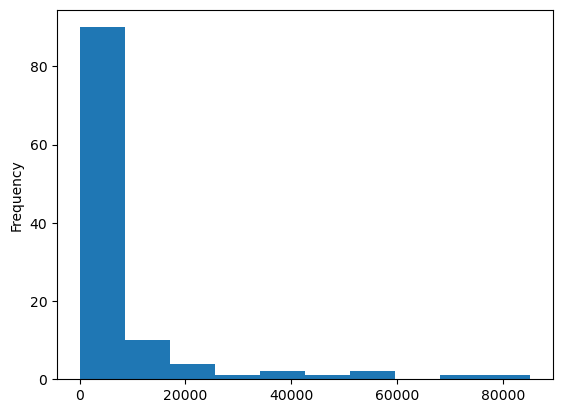

In [31]:
grouped_df_total['apprentices_finalized'].plot(kind='hist');

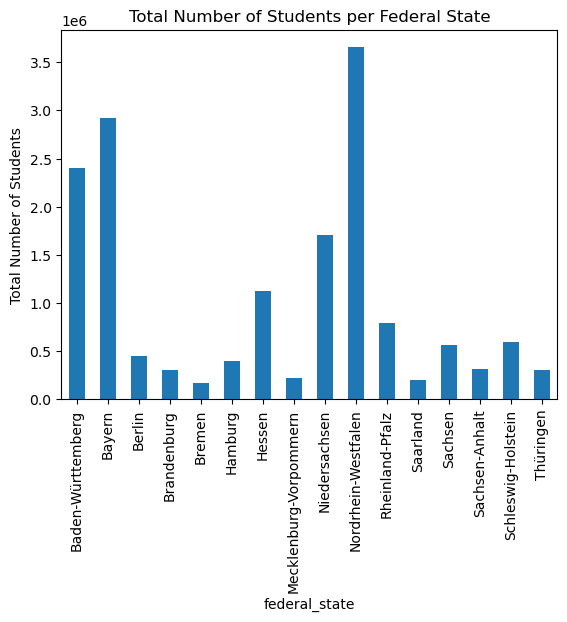

In [138]:
# Group data by 'Federal State' and sum the values of 'Apprentices' for each group
grouped = a_df2.groupby('federal_state')['apprentices_finalized'].sum()

# Plot the grouped data as a bar graph
grouped.plot.bar()

# Add a title and label for the y-axis
plt.title("Total Number of Students per Federal State")
plt.ylabel("Total Number of Students")

# Show the graph
plt.show()

In [140]:
grouped.head()

federal_state
Baden-Württemberg    2400954.0
Bayern               2923065.0
Berlin                453114.0
Brandenburg           304524.0
Bremen                171513.0
Name: apprentices_finalized, dtype: float64

In [32]:
grouped_2 = a_df2[(a_df2['year'] == 2021) & (a_df2['gender'] == 'Total') & (a_df2['training_area'])]['apprentices_finalized'].sum()
print(type(grouped_2))

<class 'numpy.float64'>


In [33]:
grouped2 = a_df2.groupby('federal_state')['apprentices_finalized'].sum()


In [34]:
grouped2 = a_df.groupby([(a_df2['year'] == 2021), (a_df2['gender'] == 'Total'),(a_df2['training_area'])]).sum()['apprentices_finalized']

/var/folders/bk/_q4ykl_n5dv3m2j12q5xyzkc0000gn/T/ipykernel_26770/682529714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped2 = a_df.groupby([(a_df2['year'] == 2021), (a_df2['gender'] == 'Total'),(a_df2['training_area'])]).sum()['apprentices_finalized']


In [35]:
grouped2.head()

year   gender  training_area      
False  False   Agriculture            816264.0
               Crafts                  32388.0
               Housekeeping           308652.0
               Industry and trade      99537.0
               Liberal professions     35421.0
Name: apprentices_finalized, dtype: float64

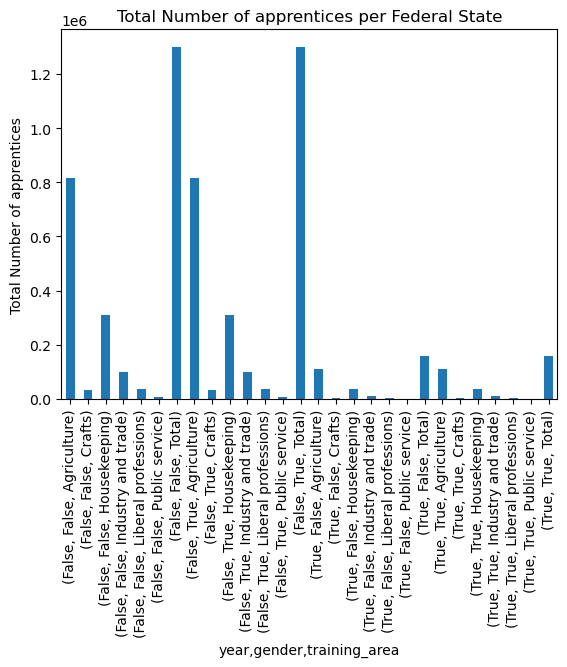

In [37]:

# Plot the grouped data as a bar graph
grouped2.plot.bar()

# Add a title and label for the y-axis
plt.title("Total Number of apprentices per Federal State")
plt.ylabel("Total Number of apprentices")

# Show the graph
plt.show()

In [38]:
a_df3 = a_df2[(a_df2['year'] == 2021) & (a_df2['gender'] == 'Total')]

In [39]:
a_df3.head(2)

,year,federal_state_ID,federal_state,training_area,gender,apprentices_finalized,new_contracts
3026,2021,8,Baden-Württemberg,Industry and trade,Total,37062.0,37722
3029,2021,8,Baden-Württemberg,Crafts,Total,12567.0,17577


In [40]:
a_df4 = a_df3.groupby(['training_area'])['apprentices_finalized'].sum()
a_df4.head(20)

training_area
Agriculture              9666.0
Crafts                  83148.0
Housekeeping             1389.0
Industry and trade     238773.0
Liberal professions     33162.0
Public service          12498.0
Total                  378630.0
Name: apprentices_finalized, dtype: float64

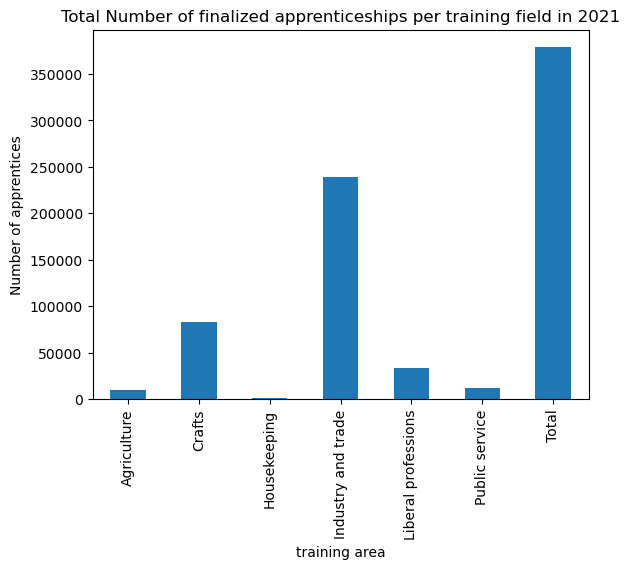

In [41]:
# Plot the grouped data as a bar graph
a_df4.plot.bar()

# Add a title and label for the y-axis
plt.title("Total Number of finalized apprenticeships per training field in 2021")
plt.ylabel("Number of apprentices")
plt.xlabel("training area")


# Show the graph
plt.show()

In [42]:
a_df5 = a_df3.groupby('federal_state')['apprentices_finalized'].sum()
a_df5.head(20)

federal_state
Baden-Württemberg         115851.0
Bayern                    139512.0
Berlin                     20220.0
Brandenburg                14238.0
Bremen                      7983.0
Hamburg                    18540.0
Hessen                     53082.0
Mecklenburg-Vorpommern     10707.0
Niedersachsen              79476.0
Nordrhein-Westfalen       170508.0
Rheinland-Pfalz            36129.0
Saarland                    8808.0
Sachsen                    27576.0
Sachsen-Anhalt             13971.0
Schleswig-Holstein         26550.0
Thüringen                  14115.0
Name: apprentices_finalized, dtype: float64

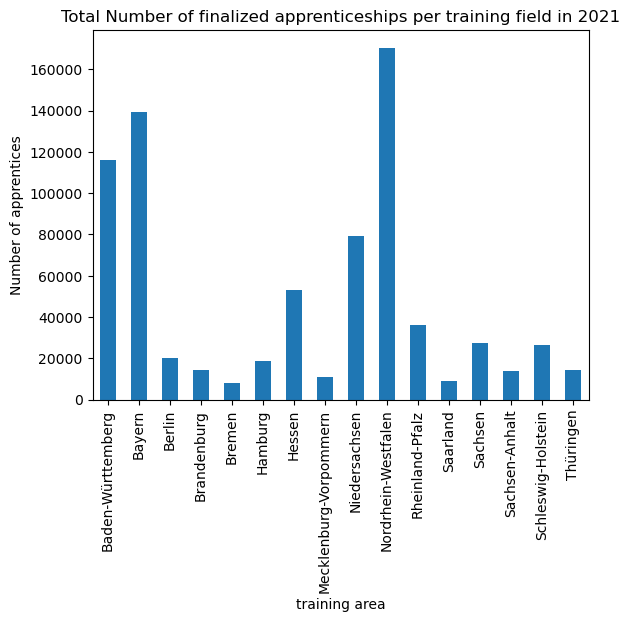

In [43]:
# Plot the grouped data as a bar graph
a_df5.plot.bar()

# Add a title and label for the y-axis
plt.title("Total Number of finalized apprenticeships per training field in 2021")
plt.ylabel("Number of apprentices")
plt.xlabel("training area")


# Show the graph
plt.show()